In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
data = df.copy()

# EDA

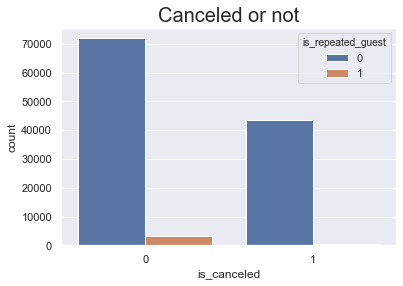

In [5]:
sns.set(style = "darkgrid")
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)

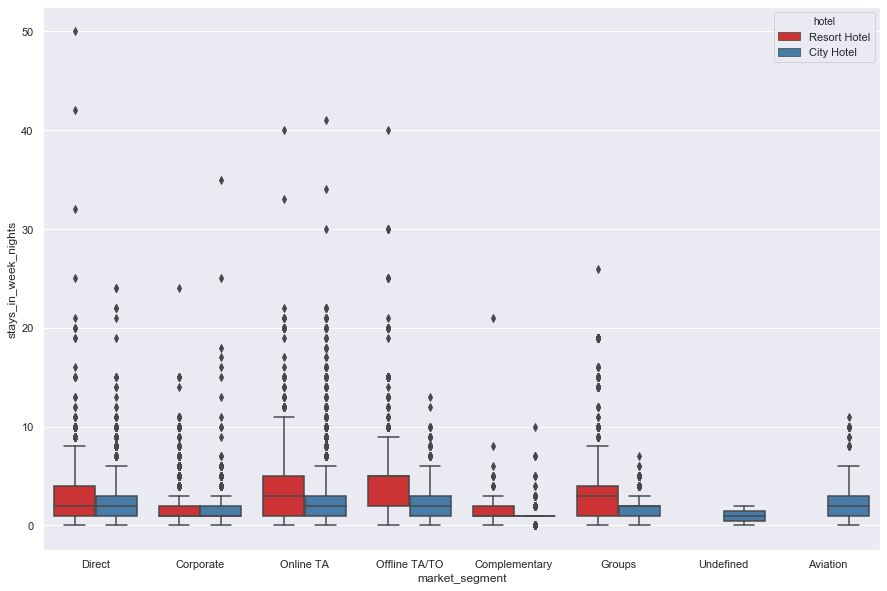

In [6]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set1');

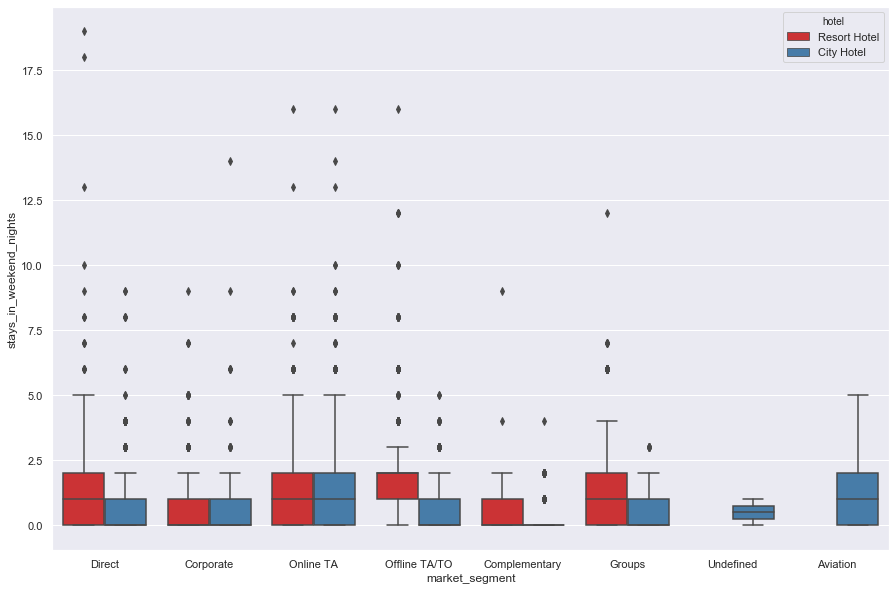

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Set1');

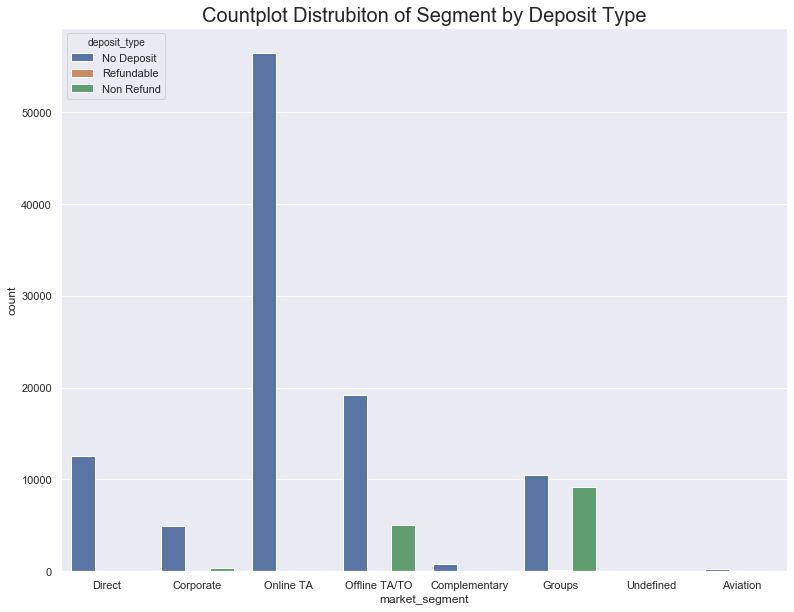

In [8]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data)

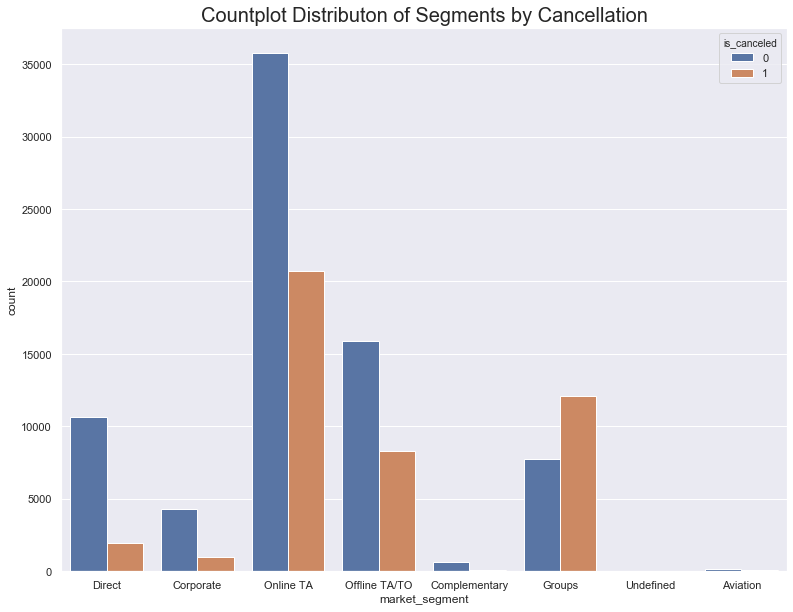

In [9]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

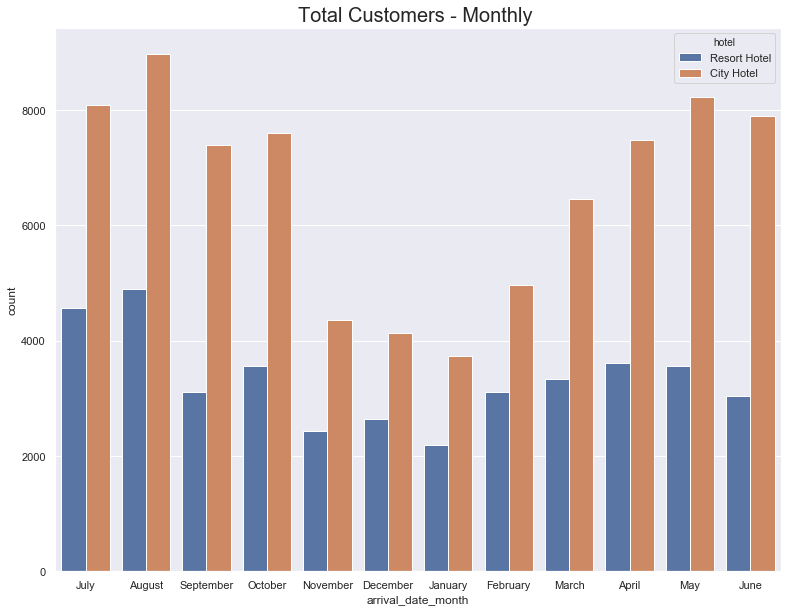

In [10]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

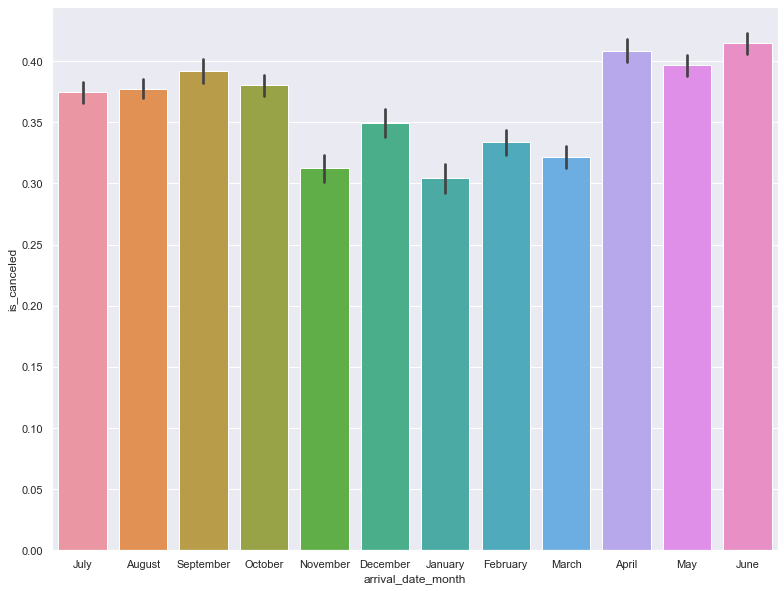

In [11]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = data);

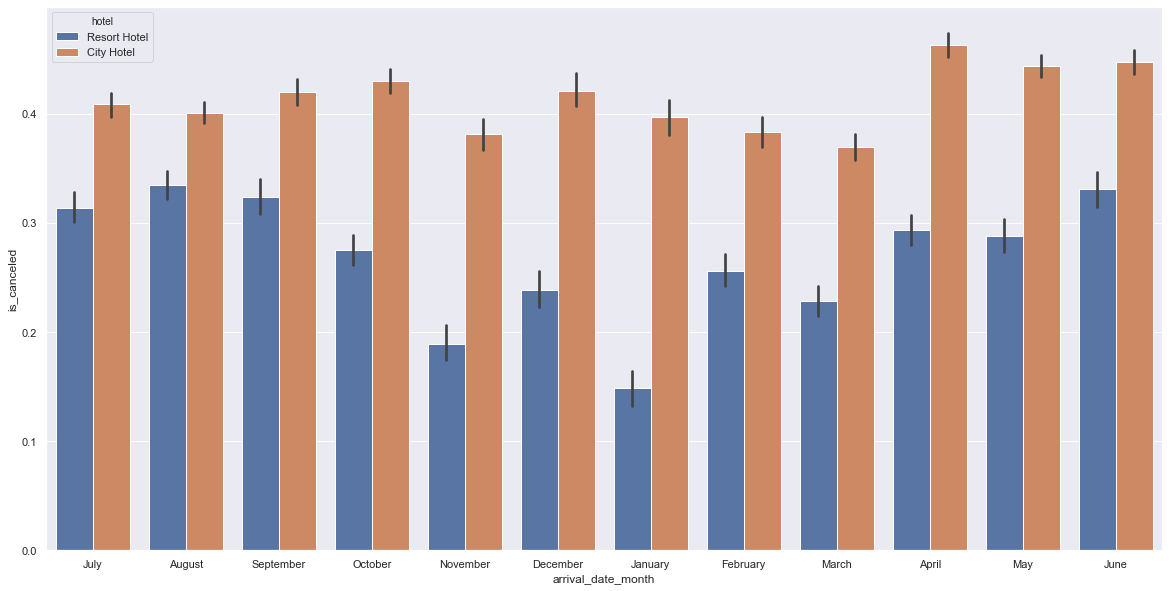

In [12]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data);

# Processing

In [13]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [14]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                                   perc_mv(df, df['agent']),
                                                                                   perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


Since 94.3% of country is null, we might drop that column if required.


In [15]:
# company is dropped
data = data.drop(['company'], axis = 1)

In [16]:
data['children'] = data['children'].fillna(0)

In [17]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [18]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [19]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [21]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [22]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)

In [23]:
# Information of these columns is also inside of new features, so it is better to drop them.

data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [24]:
# Lets copy data to check the correlation between variables. 
cor_data = data.copy()

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [28]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


In [29]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

In [30]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [31]:
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

In [32]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [44]:
# I keep data in case of any changes on features, missing values etc.
df1 = cor_data.copy()

In [45]:
df1['country'] = le.fit_transform(df1['country']) 

In [46]:
y = df1["is_canceled"]
X = df1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [47]:
X

,hotel,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given
0,0,342,2015,1,0,0,135,3,1,0,...,3,0,2,0.00,0,0,1,0,2.0,0
1,0,737,2015,1,0,0,135,3,1,0,...,4,0,2,0.00,0,0,1,0,2.0,0
2,0,7,2015,1,1,0,59,3,1,0,...,0,0,2,75.00,0,0,1,0,1.0,0
3,0,13,2015,1,1,0,59,2,0,0,...,0,0,2,75.00,0,0,1,0,1.0,0
4,0,14,2015,1,2,0,59,6,3,0,...,0,0,2,98.00,0,1,1,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,23,2017,30,5,0,15,5,3,0,...,0,0,2,96.14,0,0,1,0,2.0,0
119386,1,102,2017,31,5,0,56,6,3,0,...,0,0,2,225.43,0,2,1,0,3.0,0
119387,1,34,2017,31,5,0,43,6,3,0,...,0,0,2,157.71,0,4,1,0,2.0,0
119388,1,109,2017,31,5,0,59,6,3,0,...,0,0,2,104.40,0,0,1,0,2.0,0


In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
cart = DecisionTreeClassifier(max_depth = 12)

In [51]:
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)


print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


In [52]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

In [53]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.989122816854027

Confusion Matrix:
 [[22353     0]
 [  388 12930]]


In [54]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.9953463597880632

Confusion Matrix:
 [[22187   166]
 [    0 13318]]


In [55]:
print('Model: SVC\n')

def model1(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel = 'linear'), X_train, X_test, y_train, y_test)

Model: SVC

Accuracy Score: 0.989122816854027

Confusion Matrix:
 [[22353     0]
 [  388 12930]]


In the correlation part, we have seen the impact of reservation status. Reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations. For the sake of analysis I will drop reservation_status and continue analysis without it.

In [60]:
df2 = df1.drop(columns = ['reservation_status'], axis = 1)


In [61]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [62]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

In [63]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.7945670152224497

Confusion Matrix:
 [[20733  1620]
 [ 5708  7610]]


In [64]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), X_train, X_test, y_train, y_test)

Model: Decision Tree

Accuracy Score: 0.8447198003980825

Confusion Matrix:
 [[20215  2138]
 [ 3401  9917]]


In [65]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8840795043592834

Confusion Matrix:
 [[20917  1436]
 [ 2699 10619]]


In [75]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [76]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 13.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [77]:
rf_cv_model.best_params_

{'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 500}

In [79]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.8566903086540888

Confusion Matrix:
 [[20910  1443]
 [ 3669  9649]]
